## Homework 6

## <em> Markov Chain Simulation and Hierarchical Model</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Link Okpy

In [1]:
from client.api.notebook import Notebook
ok = Notebook('hw6_188.ok')
_ = ok.auth(inline = True)

Assignment: Homework 6
OK, version v1.12.5

Successfully logged in as chancetran@berkeley.edu


### Imports

In [2]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Simulated Annealing

Reference: Newman, Computational Physics (p. 490-497)<br><br>
For a physical system in equilibrium at temperature $T$, the probability that at any moment the system is in a state $i$ is given by the Boltzmann probability. Let us assume our system has single unique ground state and let us choose our energy scale so that $E_i = 0$ in the ground state and $E_i > 0$ for all other states. Now suppose we cool down the system to absolute zero. The system will definitely be in the ground state, and consequently one way to find the ground state of the system is to cool it down to $T = 0$.
<br><br>
This in turn suggests a computational strategy for finding the ground state: let us simulate the system at temperature $T$, using the Markov chain Monte Carlo method, then lower the temperature to zero and the system should find its way to the ground state. This same approach could be used to find the minimum of any function, not just the energy of a physical system. we can take any mathematical function $f(x, y, z, ...)$ and treat the independent variables $x, y, z$ as defining a "state" of the system and $f$ as being the energy of that system, then perform a Monte Carlo simulation. Taking the temperature down to zero will again cause the system to fall into its ground state, i.e. the state with the lowest value of $f$, and hence we find the minimum of the function.
<br><br>
However, if the system is cooled rapidly, it can get stuck in a local energy minimum. On the other hand, an annealed system, one that is cooled sufficiently slowly, can find its way to the ground state. Simulated annleaing applies the same idea in a computational setting. It mimics the slow cooling of a material on the computer by using a Monte Carlo simulation with a temperature parameter that is gradually lowered from an initially high value towards zero. The initial temperature should be chosen so that the system equilibrates quickly. To achieve this, we should choose the thermal energy to be significantly greater than the typical energy change accompanying a single Monte Carlo move. 
<br><br>
As for the rate of cooling, one typically specifies a "cooling schedule," a trajectory for the temperature as a function of time, and the most common choise is the exponential one:
<br><br>
$$ T = T_0 e^{-t/\tau} $$
<br><br>
where $T_0$ is the initial temperature, and $\tau$ is a time constant. Some trial error may be necessary to find a good value for $\tau$. 
<br><br>
As an example of the use of simulated annealing, we will look at one of the most famous optimization problems, traveling salesman problem, which involves finding the shortest route that visits a given set of locations on a map. A salesman wishes to visit $N$ given cities, and we assume that he can travel in a straight line between any pair of citiies. Given the coordinates of the cities, the problem is to devise the shortest tour. It should start and end at the same city, and all cities must be visited at least once. Let us denote the position of the city $i$ by the two-dimensional vector $r_i = (x_i, y_i)$.
<br><br>
Here is the solution:


/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:60: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


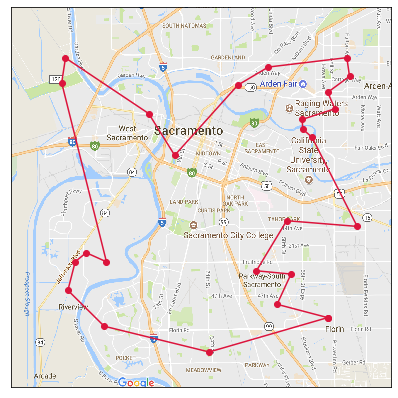

In [3]:
# Traveling salesman (Newman p. 493)
from math import sqrt,exp
from numpy import empty
from random import random,randrange
from scipy.misc import imread

N = 25
R = 0.02
Tmax = 10.0
Tmin = 1.0e-3
tau = 1e4

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0] ** 2 + x[1] ** 2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i + 1] - r[i])
    return s

# Choose N city locations and calculate the initial distance
r = empty([N + 1,2],float)
for i in range(N):
    r[i,0] = random()
    r[i,1] = random()
r[N] = r[0]
D = distance()

# Main loop
t = 0
T = Tmax
while T > Tmin:

    # Cooling
    t += 1
    T = Tmax * exp(-t / tau)

    # Choose two cities to swap and make sure they are distinct
    i, j = randrange(1, N),randrange(1, N)
    while i == j:
        i, j = randrange(1, N),randrange(1, N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0], r[j,0] = r[j,0], r[i,0]
    r[i,1], r[j,1] = r[j,1], r[i,1]
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random() > exp(-deltaD / T):
        r[i,0], r[j,0] = r[j,0], r[i,0]
        r[i,1], r[j,1] = r[j,1], r[i,1]
        D = oldD

plt.figure(figsize = (8, 7))
img = imread("map_sacramento.png")
plt.plot(r[:,0], r[:,1], 'o-', color = 'crimson', zorder=1)
plt.imshow(img, zorder = 0, extent = [-0.1, 1.1, -0.1, 1.1])
plt.xticks([])
plt.yticks([])
plt.show()

Now, consider the function $f(x) = x^2 − \mathrm{cos}(4\pi x)$, which looks like this:

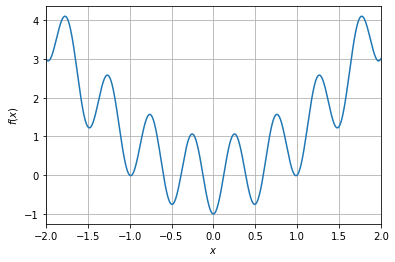

In [4]:
x = np.linspace(-2, 2, 1000)
y = x ** 2 - np.cos(4 * np.pi * x)
plt.plot(x, y)
plt.grid(True); plt.xlim(-2, 2); plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.show()

Clearly the global minimum of this function is at $x = 0$.

<span style="color:blue"><i> 1. Write a program to confirm this fact using simulated annealing starting at, say, $x = 2$, with Monte Carlo moves of the form $x \rightarrow x + \delta$ where $\delta$ is a random number drawn from a Gaussian distribution with mean zero and standard deviation one. Use an exponential cooling schedule and adjust the start and end temperatures, as well as the exponential constant, until you find values that give good answers in reasonable time. Have your program make a plot of the values of $x$ as a function of time during the run and have it print out the final value of x at the end. You will find the plot easier to interpret if you make it using dots rather than lines, with a statement of the form plot(x,".") or similar. </i></span> <br>

In [5]:
def y(x):
    return np.power(x, 2) - np.cos(4 *np.pi * x)

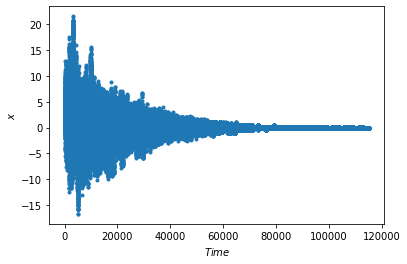

The final position is: 0.0020623249897257336


In [6]:
# Constants
Tmax = 100.0
Tmin = 1.0e-3
tau = 1.0e4

# Initializtion of position array.
x = np.array([2.0])

# Main loop.
t = 0
T = Tmax
while T > Tmin:
    # Cooling.
    t += 1
    T = Tmax * np.exp(-t / tau)
    
    # Computes x -> x + delta and adds it to the position array.
    delta = x[t - 1] + np.random.normal(0.0, 1.0)
        
    x = np.append(x, delta)
    
    # The probability that x -> x + delta would occur.
    probability = np.exp((y(x[t - 1]) - y(x[t])) / T)
    
    # The conditional cases
    if y(x[t]) < y(x[t - 1]):
        continue
    elif y(x[t]) > y(x[t - 1]) and np.random.uniform() > probability:
        x[t] = x[t - 1]

# Plotting.
plt.plot(np.arange(x.size), x, '.')
plt.xlabel("$Time$")
plt.ylabel("$x$")
plt.show() 

print("The final position is:", x[-1])

<span style="color:blue"> <i> 2. Now adapt your program to find the minimum of the more complicated function $f(x) = \mathrm{cos}(x) + \mathrm{cos}(\sqrt{2}x) + \mathrm{cos}(\sqrt{3}x)$ in the range $0 < x < 50$. </i></span><br><br>
(Hint: The correct answer is around $x = 16$, but there are also competing minima around $x = 2$ and $x = 42$ that your program might find. In real-world situations, it is often good enough to find any reasonable solution to a problem, not necessarily the absolute best, so the fact that the program sometimes settles on these other solutions is not necessarily a bad thing.)

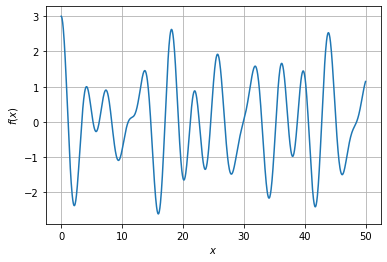

In [7]:
x = np.linspace(0, 50, 1000)
y = np.cos(x) + np.cos(np.sqrt(2) * x) + np.cos(np.sqrt(3) * x)
plt.plot(x, y)
plt.grid(True); plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.show()

In [8]:
def y(x):
    return np.cos(x) + np.cos(np.sqrt(2) * x) + np.cos(np.sqrt(3) * x)

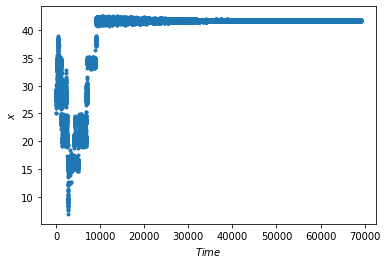

The final position is: 41.76195666612809


In [10]:
# Constants
Tmax = 1.0
Tmin = 1.0e-3
tau = 1.0e4

# Initializtion of position array.
x = np.array([25.0])

# Main loop.
t = 0
T = Tmax
while T > Tmin:
    # Cooling.
    t += 1
    T = Tmax * np.exp(-t / tau)
    
    # Computes x -> x + delta and adds it to the position array.
    delta = x[t - 1] + np.random.normal(0.0, 1.0)
    # Ensures that x 
    while (0 > delta or delta > 50):
        delta = x[t - 1] + np.random.normal(0.0, 1.0)
        
    x = np.append(x, delta)
    
    # The probability that x -> x + delta would occur.
    probability = np.exp((y(x[t - 1]) - y(x[t])) / T)
    
    # The conditional cases
    if y(x[t]) < y(x[t - 1]):
        continue
    elif y(x[t]) > y(x[t - 1]) and np.random.uniform() > probability :
        x[t] = x[t - 1]

# Plotting.
plt.plot(np.arange(x.size), x, '.')
plt.xlabel("$Time$")
plt.ylabel("$x$")
plt.show() 

print("The final position is:", x[-1])

***

#### Problem 2 - Hierarchial Normal Model

Reference: Gelman et al., Bayesian Data Analysis (p. 288-290) <br><br>
![alt text](table3.png "Title")
Table 1. Coagulation time in seconds for blood drawn from 24 animals randomly allocated to four different diets. Different treatments have different numbers of observations because the randomization was unrestricted.<br><br>
Under the hierarchical normal model, data $y_{ij}$, for $i = 1, ..., n_j$ and $j = 1, ... ,J$, are independently normally distributed within each of $J$ groups, with means $\theta_j$ and common variance $\sigma^2$. The data is presented in Table 1. (In this case, there are $J = 4$ groups (or 4 sets of experiments - A, B, C, and D), and for each group $j$, we have a data vector $y_j$ with the mean $\theta_j$; $y_j = [y_{1j}, ... , y_{n_j\ j}]$ (there have been $n_j$ observations made.) (e.g. j = 1 represents the diet A group. So $y_{i1} = [y_{11}, y_{21}, y_{31}, y_{41}] = [62, 60, 63, 59]$ with $n_1 = 4.$ <br><br>
The total number of observations is $n = \sum_{j=1}^J n_j$. The group means ($\theta_j$) are assumed to follow a normal distribution with unknown mean $\mu$ and variance $\tau^2$, and a uniform prior distribution is assumed for $(\mu, \mathrm{log}\sigma, \tau)$, with $\sigma > 0$ and $\tau > 0$; equivalently, $p(\mu, \mathrm{log}\sigma, \mathrm{log}\tau) \propto \tau$. <br><br>
The joint posterior density of all the parameters is<br><br>
$$ p(\theta, \mu, \mathrm{log}\sigma, \mathrm{log}\tau\ \vert\ y) \propto p(\mu, \mathrm{log}\sigma, \mathrm{log}\tau) \prod_{j=1}^J \mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) \prod_{j=1}^J \prod_{i=1}^{n_j} \mathrm{Normal}(y_{ij}\ \vert\ \theta_j, \sigma^2) $$
<br><br>
where $\mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) = \frac{1}{\sqrt{2\pi \tau^2}}\mathrm{exp}(-\frac{(\theta_j-\mu)^2}{2\tau^2})$.
<br><br>
<span style="color:blue"> <i> 1. Now, find the MAP (Maximum A Posteriori) solution to this (find the solution to MAP for all these parameters). In other words, find $\theta_j, \mu, \sigma, \tau$ which maximizes the likelihood. </i></span><br><br>
(Hint: The likelihood is given as $\prod_{j=1}^J \mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) \prod_{j=1}^J \prod_{i=1}^{n_j} \mathrm{Normal}(y_{ij}\ \vert\ \theta_j, \sigma^2)$. Take the log of the likelihood and maximize it using scipy.optimize.fmin (https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.fmin.html). Note that you need to make initial guesses on the parameters in order to use fmin. Make a reasonable guess! You can use a different in-built function to maximize the likelihood function. <br>
Caveat: "fmin" minimizes a given function, so you should multiply the log-likelihood by $-1$ in order to maximize it using fmin.)

In [11]:
# Load data
A = np.array([62, 60, 63, 59])
B = np.array([63, 67, 71, 64, 65, 66])
C = np.array([68, 66, 71, 67, 68, 68])
D = np.array([56, 62, 60, 61, 63, 64, 63, 59])

data = []
data.append(A)
data.append(B)
data.append(C)
data.append(D)

data = np.array(data)

# Labels for printing and etc.
labels = ['theta1', 'theta2', 'theta3', 'theta4', 'mu', 'sigma', 'tau']

In [12]:
# Computes Normal(theta[j]| mu, tau^2).
def normal(theta, mu, tau):
    return np.exp(-np.power(theta - mu, 2) / (2 * np.power(tau, 2))) / np.sqrt(2 * np.pi * np.power(tau, 2))

# Computes the negative log likelihood.
def minus_log_likelihood(param, y_i1 = data[0], y_i2 = data[1], y_i3 = data[2], y_i4 = data[3]):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    
    theta = np.array([theta1, theta2, theta3, theta4])
    y = [y_i1, y_i2, y_i3, y_i4]
    
    # Computes Product(Normal(theta[j]| mu, tau^2), j).
    product1 = 1
    for j in range(4):
        product1 *= normal(theta[j], mu, tau)
    
    # Computes Product(Product(Normal(y[i,j]| theta[j], sigma^2), i), j).
    product2 = 1
    for i in range(4):
        for j in range(y[i].size):  
            product2 *= normal(y[i][j], theta[i], sigma)

    return -np.log10(product1 * product2)

In [13]:
from scipy import optimize

# Initial guess.
parameters_i = np.array([A.mean(), B.mean(), C.mean(), D.mean(), 2.0, 10.0, 60.0])

# Calculates the minimum parameters.
minimum = optimize.fmin(minus_log_likelihood, parameters_i)

# Prints the initial parameters and the computed minimums for comparison.
print("\nThe initial guess for the parameters was:")
for i in range(7):
    print(labels[i] + ':', parameters_i[i])
    
print("\nThe minimum determined by fmin() is:")
for i in range(7):
    print(labels[i] + ':', minimum[i])

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10



The initial guess for the parameters was:
theta1: 61.0
theta2: 66.0
theta3: 68.0
theta4: 61.0
mu: 2.0
sigma: 10.0
tau: 60.0

The minimum determined by fmin() is:
theta1: 61.42109915248174
theta2: 65.86392564845033
theta3: 67.56535920170174
theta4: 61.22404258738864
mu: 64.02004849490729
sigma: 2.1836588450727445
tau: 2.7686753489003664


You should find that the MAP solution is dependent on your initial guesses. The point is that the maximal likelihood estimator is biased, even though we have all the parameters. 
Hence, it is better to use the Monte Carlo simulation for the parameter estimation; we can also determine posterior quantiles with the Monte Carlo method. First, we will try the <b>Gibbs sampler</b>. <br><br>
<b>Starting points:</b><br>
In this example, we can choose overdispersed starting points for each parameter $\theta_j$ by simply taking random points from the data $y_{ij}$ from group $j$. We obtain 10 starting points for the simulations by drawing $θ_j$ independently in this way for each group. We also need starting points for $\mu$, which can be taken as the average of the starting $θ_j$ values. No starting values are needed for $\tau$ or $\sigma$ as they can be drawn as the first steps in the Gibbs sampler.<br><br>
<b>Conditional posterior distribution of $\sigma^2$:</b><br>
The conditional posterior density for $\sigma^2$ has the form corresponding to a normal variance with known mean; there are $n$ observations $y_{ij}$ with means $\theta_j$. The conditional posterior distribution is<br>
$$ \sigma^2 | \theta, \mu, \tau, y \sim \mathrm{Inv}\mbox{-}\chi^2(n, \hat{\sigma}^2) $$
<br>
where $$\mathrm{Inv}\mbox{-}\chi^2(x|n, \hat{\sigma}^2) = \mathrm{Inv\mbox{-}gamma}\Big(\alpha = \frac{n}{2}, \beta = \frac{n}{2}\hat{\sigma}^2 \Big) = \frac{\beta^\alpha}{\Gamma(\alpha)}x^{-(\alpha+1)}\mathrm{exp}(-\beta/x)$$
<br>
$$ \hat{\sigma}^2 = \frac{1}{n}\sum_{j=1}^J \sum_{i=1}^{n_j} (y_{ij}-\theta_j)^2 $$
<br><br>
(Hint: You can take random samples from the inverse gamma function using scipy.stats.invgamma - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.invgamma.html. <br> invgamma.rvs(alpha, scale = beta, size=1) will take one random sample from $\mathrm{Inv\mbox{-}gamma}(\alpha, \beta)$.)
<br><br>
<b>Conditional posterior distribution of $\tau^2$:</b><br>
Conditional on $y$ and the other parameters in the model, $\mu$ has a normal distribution determined by the $J$ values $\theta_j$:<br>
$$ \tau^2 | \theta, \mu, \sigma, y \sim \mathrm{Inv}\mbox{-}\chi^2(J-1, \hat{\tau}^2) $$
<br>
with $$ \hat{\tau}^2 = \frac{1}{J-1} \sum_{j=1}^J (\theta_j - \mu)^2. $$
<br><br>
<b>Conditional posterior distribution of each $\theta_j$:</b><br>
The factors in the joint posterior density that involve $\theta_j$ are the $N(\mu, \tau^2)$ prior distribution and the normal likelihood from the data in the $j$th group, $y_{ij}$ , $i = 1, ... , n_j$ . The conditional posterior distribution of each $\theta_j$ given the other parameters in the model is <br>
$$ \theta_j | \mu, \sigma, \tau, y \sim \mathrm{Normal}(\hat{\theta_j}, V_{\theta_j}) $$
<br><br>
where the parameters of the conditional posterior distribution depend on $\mu, \sigma, \tau$ as well as $y$:
<br><br>
$$ \hat{\theta_j} = \frac{\frac{1}{\tau^2}\mu + \frac{n_j}{\sigma^2}(\frac{1}{n_j}\sum_{i=1}^{n_j} y_{ij})}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2}} $$
<br>
$$ V_{\theta_j} = \frac{1}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2}} $$
<br><br>
These conditional distributions are independent; thus drawing the $\theta_j$’s one at a time is equivalent to drawing the vector $\theta$ all at once from its conditional posterior distribution.
<br><br>
<b>Conditional posterior distribution of $\mu$:</b><br>
Conditional on $y$ and the other parameters in the model, $\mu$ has a normal distribution determined by the $J$ values $\theta_j$:<br>
$$ \mu | \theta, \sigma, \tau, y \sim \mathrm{Normal}(\hat{\mu}, \tau^2/J) $$
<br>
where $\hat{\mu} = \frac{1}{J}\sum_{j=1}^J \theta_j$.

<br><br>
<span style="color:blue"> <i> 2. Define a function which does the Gibbs sampling. Take 100 samples. Remove the first 50 sequences and store the latter half. Repeat this 10 times so that you get ten Gibbs sampler sequences, each of length 50. We have 7 parameters ($\theta_1, ..., \theta_4, \mu, \sigma, \tau$), and for each parameter, you created 10 chains, each of length 50. </i></span>

In [14]:
from scipy.stats import invgamma

# Constants.
J = 4.0
n = 100

theta = np.array([A.mean(), B.mean(), C.mean(), D.mean()])
mu = theta.mean()

# Used for the sigma^2 CDP model.
sigma_hat_2 = np.sum([np.power(data[i][j] - theta[i], 2) for i in range(4) for j in range(data[i].size)]) / n

# Used for the tau^2 CDP model.
tau_hat_2 = np.sum(np.power(theta - mu, 2)) / (J - 1.0)

# Used for the theta_j CDP model.
def theta_j_hat(j):
    numerator = mu / tau_hat_2 + np.sum(data[j]) / sigma_hat_2
    denominator = (1 / tau_hat_2) + (data[j].size / sigma_hat_2)

    return numerator / denominator

# Used for the theta_j CDP model.
def V_theta_j(j):
    return 1 / ((1 / tau_hat_2) + (data[j].size / sigma_hat_2))

# Used for the mu CDP model.
mu_hat = np.sum(theta) / J

# Computes MCMC chains using Gibbs sampler method.
gibbs_samples = np.zeros((50, 10, 7))
for i in range(7):
    for j in range(10):
        temp_samples = np.zeros((100, 7))
        for k in range(100):
            # Computes theta_j_hat and V_theta_j for each j.
            theta_hat = [theta_j_hat(j) for j in range(4)]
            V_theta = [V_theta_j(j) for j in range(4)]
            
            # Computes the CDP for each parameter.
            cdp_theta = [np.random.normal(theta_hat[l], V_theta[l]) for l in range(4)]
            cdp_mu = np.random.normal(mu_hat, tau_hat_2 / J)
            cdp_sigma_2 = invgamma.rvs(n / 2.0, scale = (n / 2.0) * sigma_hat_2, size = 1)[0]
            cdp_tau_2 = invgamma.rvs(J - 1.0, scale = tau_hat_2, size = 1)[0]

            temp_samples[k] = [cdp_theta[0], cdp_theta[1], cdp_theta[2], cdp_theta[3], cdp_mu, cdp_sigma_2, cdp_tau_2]
        
        # 'Burns' half the samples and saves the other half.
        gibbs_samples[:,j,:] = temp_samples[50:]

<span style="color:blue"> <i> 3. Estimate posterior quantiles. Find 2.5%, 25%, 50%, 75%, 97.5% posterior percentiles of all parameters. </i></span><br>
(Hint: You can use np.percentile - https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html.)

In [15]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

for i in range(7):
    quantiles = np.percentile(gibbs_samples[:,:,i], percentiles)
    print("For " + labels[i] + ":")
    print("2.5% percentile:", quantiles[0])
    print("25% percentile:", quantiles[1])
    print("50% percentile:", quantiles[2])
    print("75% percentile:", quantiles[3])
    print("97.5% percentile:", quantiles[4])
    print()

For theta1:
2.5% percentile: 60.55650684918282
25% percentile: 60.89589806372743
50% percentile: 61.09728228516708
75% percentile: 61.28597641864537
97.5% percentile: 61.62234693492698

For theta2:
2.5% percentile: 65.62546231846132
25% percentile: 65.84719646319056
50% percentile: 65.96944693323829
75% percentile: 66.0844776447761
97.5% percentile: 66.30989271090249

For theta3:
2.5% percentile: 67.58942439543696
25% percentile: 67.7992629141167
50% percentile: 67.93072516107753
75% percentile: 68.05560015496357
97.5% percentile: 68.30427129754898

For theta4:
2.5% percentile: 60.74999663473359
25% percentile: 60.94209860327138
50% percentile: 61.02165711437737
75% percentile: 61.13162924744725
97.5% percentile: 61.305530513039955

For mu:
2.5% percentile: 57.88387029981375
25% percentile: 61.696682401593
50% percentile: 64.02743936180829
75% percentile: 65.94305083102502
97.5% percentile: 69.9405967093084

For sigma:
2.5% percentile: 0.8832265132923265
25% percentile: 1.0324635769120

<span style="color:blue"> <i> 4. Now, test for convergence using "Gelman-Rubin statistic." For all seven parameters, compute $R$ and determine if the condition $R < 1.1$ is satisfied.  </i></span><br><br>
For a given parameter $\theta$, the $R$ statistic compares the variance across chains with the variance within a chain. 
<br>Given chains $J=1,\ldots,m$, each of length $n$, <br>
Let $B=\frac{n}{m-1} \sum_j \left(\bar{\theta}_j - \bar{\theta}\right)^2$, where $\bar{\theta_j}$ is the average $\theta$ for chain $j$ and $\bar{\theta}$ is the global average. This is proportional to the variance of the individual-chain averages for $\theta$.<br>
Let $W=\frac{1}{m}\sum_j s_j^2$, where $s_j^2$ is the estimated variance of $\theta$ within chain $j$. This is the average of the individual-chain variances for $\theta$.<br>
Let $V=\frac{n-1}{n}W + \frac{1}{n}B$. This is an estimate for the overall variance of $\theta$.
<br><br>
Finally, $R=\sqrt{\frac{V}{W}}$. We'd like to see $R\approx 1$ (e.g. $R < 1.1$ is often used). Note that this calculation can also be used to track convergence of combinations of parameters, or anything else derived from them. 

In [16]:
# Constants.
m = 10
n = 50

# Computes B.
def B(chains, parameter):
    sumTotal = 0.0
    for j in range(m):
        sumTotal += (chains[:,j,parameter].mean() - chains[:,:,parameter].mean()) ** 2
        
    return n / (m - 1) * sumTotal

# Computes W.
def W(chains, parameter):
    sumTotal = 0.0
    for j in range(m):
        sumTotal += chains[:,j,parameter].var()
        
    return sumTotal / m

# Computes V.
def V(chains, parameter):
    return (n - 1) / n * W(chains, parameter) + (1 / n) * B(chains, parameter)

# Computes R.
def R(chains, parameter):
    return np.sqrt(V(chains, parameter) / W(chains, parameter))

In [17]:
for i in range(7):
    print("R of %s = %.5e" % (labels[i], R(gibbs_samples, i)))

R of theta1 = 1.00354e+00
R of theta2 = 9.96281e-01
R of theta3 = 1.00310e+00
R of theta4 = 9.99979e-01
R of mu = 1.00335e+00
R of sigma = 1.00503e+00
R of tau = 9.93571e-01


Now, try the <b>Metropolis algorithm</b>. 

<span style="color:blue"> <i> 5. Run ten parallel sequences of Metropolis algorithm simulations using the package "emcee" (http://dfm.io/emcee/current/). First, define the log of prior (already given to you), likelihood, and posterior (Hint: http://dfm.io/emcee/current/user/line/) </i></span><br>

In [18]:
import emcee

In [19]:
def log_prior(param):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    if sigma > 0.0 and tau > 0.0:
        return 0.0
    return -np.inf

##### MANUAL LOG FUNCTION. #####
def log_likelihood(param, y_i1 = data[0], y_i2 = data[1], y_i3 = data[2], y_i4 = data[3]):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    
    theta = np.array([theta1, theta2, theta3, theta4])
    y = [y_i1, y_i2, y_i3, y_i4]
    
    part1 = 0
    for i in range(4):
        part1 -= (np.power(theta[i] - mu, 2)) / (2 * np.power(tau, 2)) + (1 / 2) * np.log(2 * np.pi * np.power(tau, 2))
    
    part2 = 0
    for i in range(4):
        for j in range(y[i].size):  
            part2 -= (np.power(y[i][j] - theta[i], 2)) / (2 * np.power(sigma, 2)) + (1 / 2) * np.log(2 * np.pi * np.power(sigma, 2))
 
    return part1 + part2
    

def log_posterior(param, data0, data1, data2, data3):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(param, data0, data1, data2, data3)

<span style="color:blue"> <i> 6. Now, try different number of MCMC walkers and burn-in period, and number of MCMC steps. At which point do you obtain similar results to those obtained
using Gibbs sampling? Run the MCMC chain and estimate posterior quantiles as in Part 3. </i></span><br>

In [20]:
emcee_trace = []
for i in range(10):
    # Here we'll set up the computation. emcee combines multiple "walkers",
    # each of which is its own MCMC chain. The number of trace results will
    # be nwalkers * nsteps

    ndim = 7  # number of parameters in the model
    nwalkers = 50  # number of MCMC walkers
    nburn = 2500 # "burn-in" period to let chains stabilize
    nsteps = 5000  # number of MCMC steps to take

    # set theta near the maximum likelihood, with 
    np.random.seed(0)
    starting_guesses = np.random.random((nwalkers, ndim))

    # Here's the function call where all the work happens:
    # we'll time it using IPython's %time magic

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data[0], data[1], data[2], data[3]])
    sampler.run_mcmc(starting_guesses, nsteps)

    emcee_trace.append(sampler.chain[:, nburn:, :].reshape(-1, ndim).T)

emcee_trace = np.array(emcee_trace)

In [21]:
np.shape(emcee_trace)

(10, 7, 125000)

In [22]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

for i in range(7):
    quantiles = np.percentile(emcee_trace[:,i,:], percentiles)
    print("For " + labels[i] + ":")
    print("2.5% percentile:", quantiles[0])
    print("25% percentile:", quantiles[1])
    print("50% percentile:", quantiles[2])
    print("75% percentile:", quantiles[3])
    print("97.5% percentile:", quantiles[4])
    print()

For theta1:
2.5% percentile: 58.74817946664755
25% percentile: 60.409737518794564
50% percentile: 61.229602629939414
75% percentile: 62.0598067123448
97.5% percentile: 63.807513913954935

For theta2:
2.5% percentile: 63.82092431569216
25% percentile: 65.2025991744508
50% percentile: 65.88161304078446
75% percentile: 66.55190162915467
97.5% percentile: 67.9071278838343

For theta3:
2.5% percentile: 65.64178650501088
25% percentile: 67.08752739184125
50% percentile: 67.78548935629047
75% percentile: 68.46806798969807
97.5% percentile: 69.8310104717771

For theta4:
2.5% percentile: 59.35789187787811
25% percentile: 60.54881197367208
50% percentile: 61.13598072677393
75% percentile: 61.727168562669114
97.5% percentile: 62.9676907896007

For mu:
2.5% percentile: 54.755890043194384
25% percentile: 62.29788666001284
50% percentile: 64.0569331692834
75% percentile: 65.80943358066868
97.5% percentile: 73.72842512608037

For sigma:
2.5% percentile: 1.8485449230453317
25% percentile: 2.2267512083

Using the package "corner," you can also easily plot the 1-d and 2-d posterior (looks familiar?). Make a plot for one chain. Plots along the diagonal correspond to 1-d constraints. The dotted lines show 16%, 50%, and 84% percentile ranges. 

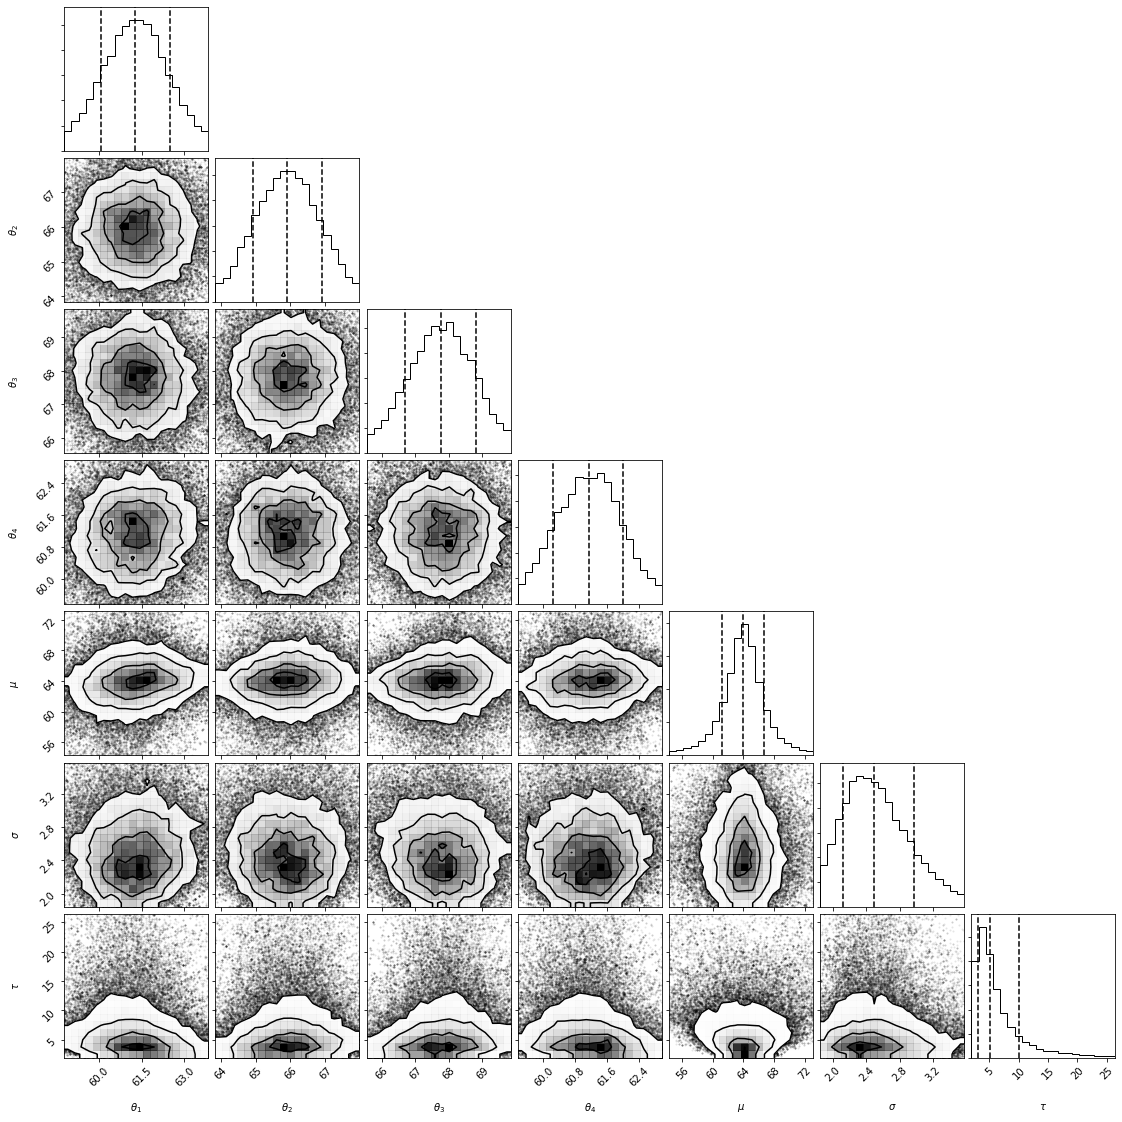

In [23]:
import corner
fig = corner.corner(emcee_trace[0, :, :].T, labels=["$\\theta_1$", "$\\theta_2$", "$\\theta_3$", "$\\theta_4$", "$\mu$", "$\sigma$", "$\\tau$"], quantiles=[0.16, 0.5, 0.84], range = 0.95*np.ones(7))

<span style="color:blue"> <i> 6. Test for convergence using Gelman-Rubin statistic as in Part 4. </i></span><br>

In [28]:
# Constants.
m = 10
n = 125000

# Computes B.
def B(chains, parameter):
    sumTotal = 0.0
    for j in range(m):
        sumTotal += (chains[j,:,parameter].mean() - chains[:,:,parameter].mean()) ** 2
        
    return n / (m - 1) * sumTotal

# Computes W.
def W(chains, parameter):
    sumTotal = 0.0
    for j in range(m):
        sumTotal += chains[j,:,parameter].var()
        
    return sumTotal / m

# Computes V.
def V(chains, parameter):
    return (n - 1) / n * W(chains, parameter) + (1 / n) * B(chains, parameter)

# Computes R.
def R(chains, parameter):
    return np.sqrt(V(chains, parameter) / W(chains, parameter))

In [29]:
for i in range(7):
    print("R of %s = %.5e" % (labels[i], R(emcee_trace, i)))

R of theta1 = 1.00023e+00
R of theta2 = 1.00024e+00
R of theta3 = 1.00024e+00
R of theta4 = 1.00024e+00
R of mu = 1.00019e+00
R of sigma = 1.00008e+00
R of tau = 1.00019e+00


<span style="color:blue"> <i> 7. Using autocorrelation_plot from pandas (https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-autocorrelation), plot the auto-correlation of six parameters and determine that it gets small for large lag. </i></span><br>


In [32]:
from pandas.plotting import autocorrelation_plot

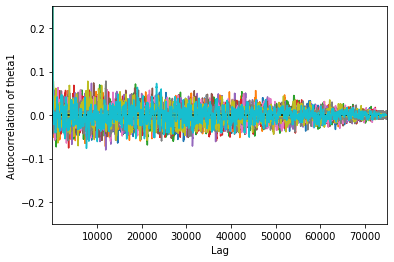

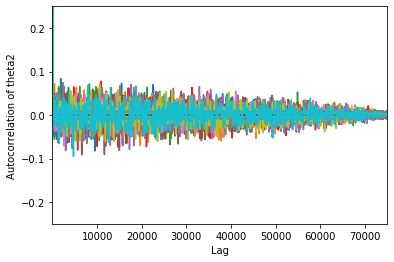

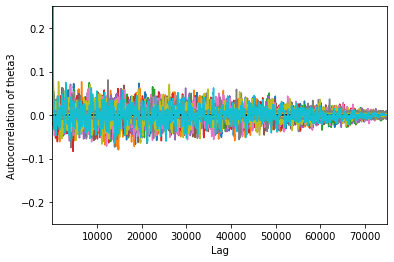

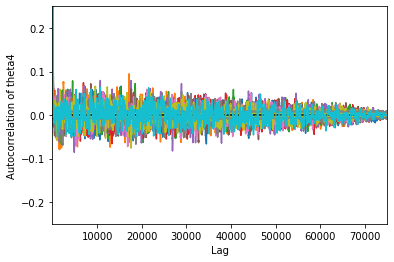

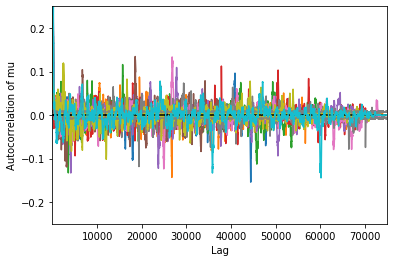

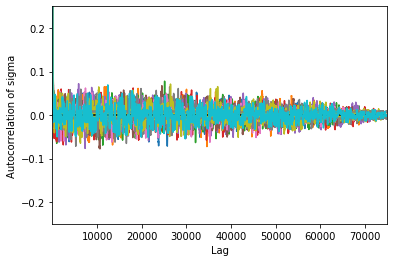

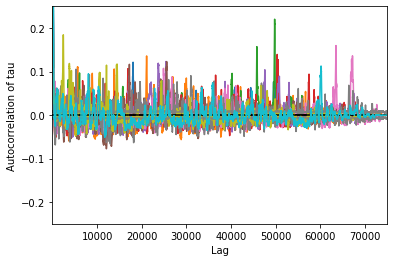

In [33]:
for ind in range(7):
    plt.figure()
    # Decreased size for time.
    for i in range(10):
        autocorrelation_plot(emcee_trace[i,ind,50000:])
    plt.ylabel('Autocorrelation of %s' %(labels[ind]))
    plt.ylim(-0.25, 0.25)
    plt.show()

<span style="color:blue"> <i> 8. Using the package "daft", plot a graphical model in this problem. <br> Note that we have $J$ experiments each with $n_j$ data, each its own mean $\theta_j$, but common variance $\sigma$. The mean $\theta_j$ has a hyperprior, generated as a
gaussian with some mean $\mu$ and variance $\tau$.<br>
(Hint: https://github.com/KIPAC/StatisticalMethods/blob/8232a7b7e870b82088fe3589b8a796430e9076d6/examples/SDSScatalog/FirstPGM.ipynb) </i></span><br>

In [ ]:
import daft
from matplotlib import rc

In [ ]:
###### REVIEW NOTES #####

***

#### Problem 3 - Mixture Model for Outliers

Suppose we have data that can be fit to a linear regression, apart from a few outlier points. It is always better to understand the underlying generative model of outliers. <br><br>
Consider the following dataset, relating the observed variables $x$ and $y$, and the error of $y$ stored in $\sigma_y$. <br><br>
We'll propose a simple linear model, which has a slope and an intercept encoded in a parameter vector $\theta$. The model is defined as follows:
![alt text](eq3_1.png "Title")
Given this model, we can compute a Gaussian likelihood for each point:
![alt text](eq3_2.png "Title")
The total likelihood is the product of all the individual likelihoods. Computing this and taking the log, we have:
![alt text](eq3_3.png "Title")
This should all look pretty familiar if you read through the previous post. This final expression is the log-likelihood of the data given the model, which can be maximized to find the $\theta$ corresponding to the maximum-likelihood model. Equivalently, we can minimize the summation term, which is known as the loss:
![alt text](eq3_4.png "Title")
This loss expression is known as a squared loss; here we've simply shown that the squared loss can be derived from the Gaussian log likelihood.

In [34]:
# Load the data
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])
e = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

labels = np.array(["theta0", "theta1"])

<span style="color:blue"> <i> 1. Determine $\theta = [\theta_0, \theta_1]$ which maximize the likelihood (or, equivalently, minimize the loss). As in Problem 2-1, you can use scipy.optimize.fmin. Plot the best-fit line (on top of data points) using $\theta$ from the MAP solution. </i></span><br>

In [35]:
def y_hat(x, theta):
    return theta[0] + theta[1] * x

def squared_loss(theta):
    return np.sum(np.power(y - y_hat(x, theta), 2) / (2 * np.power(e, 2)))

In [36]:
from scipy import optimize

# Initial guess.
theta_i = np.array([x.mean(), y.mean()])

# Calculates the minimum parameters.
minimum = optimize.fmin(squared_loss, theta_i)

# Prints the initial parameters and the computed minimums for comparison.
print("\nThe initial guess for the parameters was:")
for i in range(2):
    print(labels[i] + ':', theta_i[i])
    
print("\nThe minimum determined by fmin() is:")
for i in range(2):
    print(labels[i] + ':', minimum[i])

Optimization terminated successfully.
         Current function value: 100.708712
         Iterations: 61
         Function evaluations: 115

The initial guess for the parameters was:
theta0: 36.9
theta1: 50.5

The minimum determined by fmin() is:
theta0: 39.69979795582458
theta1: 0.23621164561742225


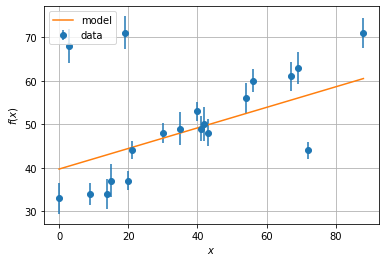

In [37]:
plt.errorbar(x, y, yerr = e, label = "data", linestyle = 'None', marker = 'o')
plt.plot(x, y_hat(x, minimum), label = "model")
plt.grid(True); plt.xlabel('$x$'); plt.ylabel('$f(x)$'); plt.legend();
plt.show()

Clearly, we get a poor fit to the data because the squared loss is overly sensitive to outliers.

The Bayesian approach to accounting for outliers generally involves modifying the model so that the outliers are accounted for. For this data, it is abundantly clear that a simple straight line is not a good fit to our data. So let's propose a more complicated model that has the flexibility to account for outliers. One option is to choose a mixture between a signal and a background:
![alt text](eq3_5.png "Title")
What we've done is expanded our model with some nuisance parameters: $\{g_i\}$ is a series of weights which range from 0 to 1 and encode for each point $i$ the degree to which it fits the model. $g_i=0$ indicates an outlier, in which case a Gaussian of width $\sigma_B$ is used in the computation of the likelihood. This $\sigma_B$ can also be a nuisance parameter, or its value can be set at a sufficiently high number, say 50.

Our model is much more complicated now: it has 22 parameters rather than 2, but the majority of these can be considered nuisance parameters, which can be marginalized-out in the end, just as we marginalized (integrated) over $p$ in the Billiard example. Let's construct a function which implements this likelihood. As in the previous post, we'll use the emcee package to explore the parameter space.

<span style="color:blue"> <i> 2. As in Problem2-Part5, define log-prior (already given to you), log-likelihood and log-posterior. </i></span><br>

In [48]:
def log_prior(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

##### MANUAL LOG FUNCTION. #####
def log_likelihood(theta, x, y, e, sigma_B):
    product1 = np.log((theta[2:] / (np.sqrt(2 * np.pi * e ** 2))) * np.exp((-(y_hat(x, theta) - y) ** 2) / (2 * e **2)))
    product2 = np.log(((1 - theta[2:]) / (np.sqrt(2 * np.pi * sigma_B ** 2))) * np.exp((-(y_hat(x, theta) - y) ** 2)/(2 * sigma_B ** 2)))
    
    return np.sum(np.logaddexp(product1, product2))

def log_posterior(theta, x, y, e, sigma_B):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, e, sigma_B)

Now, run the MCMC samples.

In [49]:
ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(minimum, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, e, 50])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Once we have these samples, we can exploit a very nice property of the Markov chains. Because their distribution models the posterior, we can integrate out (i.e. marginalize) over nuisance parameters simply by ignoring them! <br><br>
We can look at the (marginalized) distribution of slopes and intercepts by examining the first two columns of the sample:

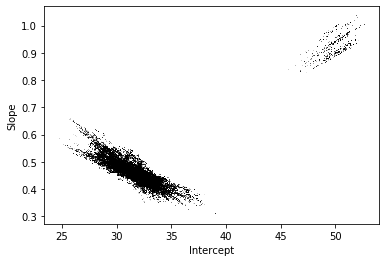

In [50]:
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.show()

We allowed the model to have a nuisance parameter $0 < g_i < 1$ for each data point: $g_i = 0$ indicates an outlier. We can also allow sb to be a nuisance parameter to marginalize over (or just make it a large number). Now, let us define an outlier whenever posterior $E(g_i) < 0.5$.
<br><br>
<span style="color:blue"> <i> 3. Using such cutoff at $g = 0.5$, identify an outlier and mark them on the plot. Also, plot the marginalized best model over the original data. </i></span><br>

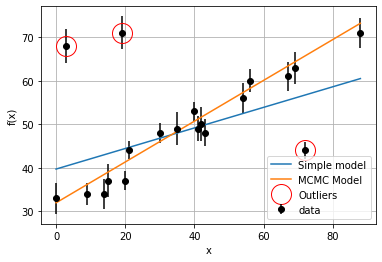

[31.94994632  0.46860827]


In [58]:
margin = np.mean(sample[:,:2],0)
g = np.mean(sample[:,2:],0)

outliers = (g < 0.5)

# Plotting.
plt.errorbar(x, y, yerr = e, fmt='.k', label = "data", linestyle = 'None', marker = 'o')
plt.plot(x, y_hat(x, minimum), label = "Simple model")
plt.plot(x, y_hat(x, margin), label = "MCMC Model")
plt.plot(x[outliers],y[outliers], 'ro', ms=20, mfc='none', label = 'Outliers', linestyle = 'None')
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)'); plt.legend()
plt.show()

#
print(margin)

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()